# 1 RAG (Retrieval Augmented Generation) with LangChain, ChromaDB & OpenAI

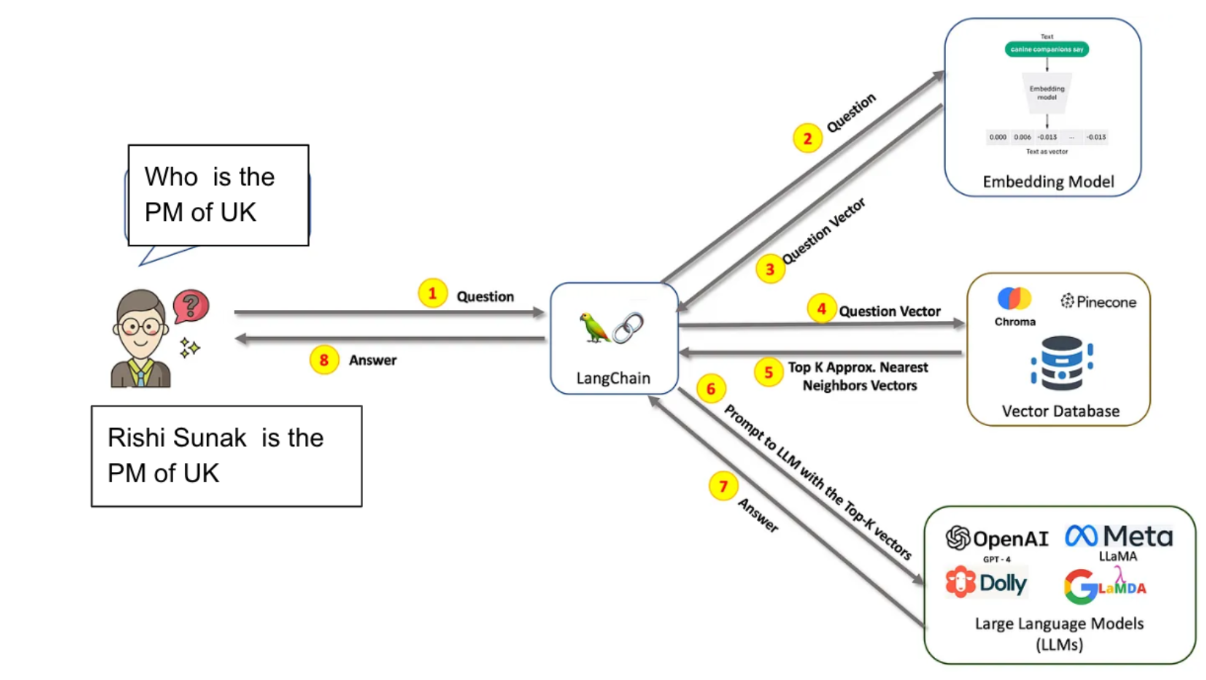

The idea behind RAG applications is to provide additional context at query time to have the LLM generate accurate and up-to-date answers.
RAG consists of 3 steps-
1. Embedding & Indexing: Documents are split into chunks,
encoded into vectors, and stored in a vector database.
2. Retrieval: Retrieve the chunks most relevant to the question based on semantic similarity.
3. Generation: Input the original question and the retrieved chunks together into LLM to generate the final answer.

# 2 SetUp

## 2.1 Download and Import Libraries

In [ ]:
!pip install -qq langchain_community
!pip install -qq tiktoken
!pip install -qq langchain-openai
!pip install -qq chromadb
!pip install -qq langchain
!pip install -qq pypdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.3/299.3 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.0/116.0 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.6/311.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.8/526.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import PyPDFLoader
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain_community.vectorstores import Chroma
from langchain.prompts import ChatPromptTemplate
from langchain_openai import OpenAIEmbeddings
from langchain_openai import ChatOpenAI
from langchain.load import dumps, loads
from operator import itemgetter
from getpass import getpass
import os

In [ ]:
from IPython.display import display, Markdown
def md(t):
  display(Markdown(t))

## 2.2 OpenAI SetUp

You can get your OpenAI API key here: https://platform.openai.com/api-keys

In [ ]:
os.environ['OPENAI_API_KEY'] = getpass("Enter your OpenAI API Key...")

Enter your OpenAI API Key...··········


# 3 RAG Workflow

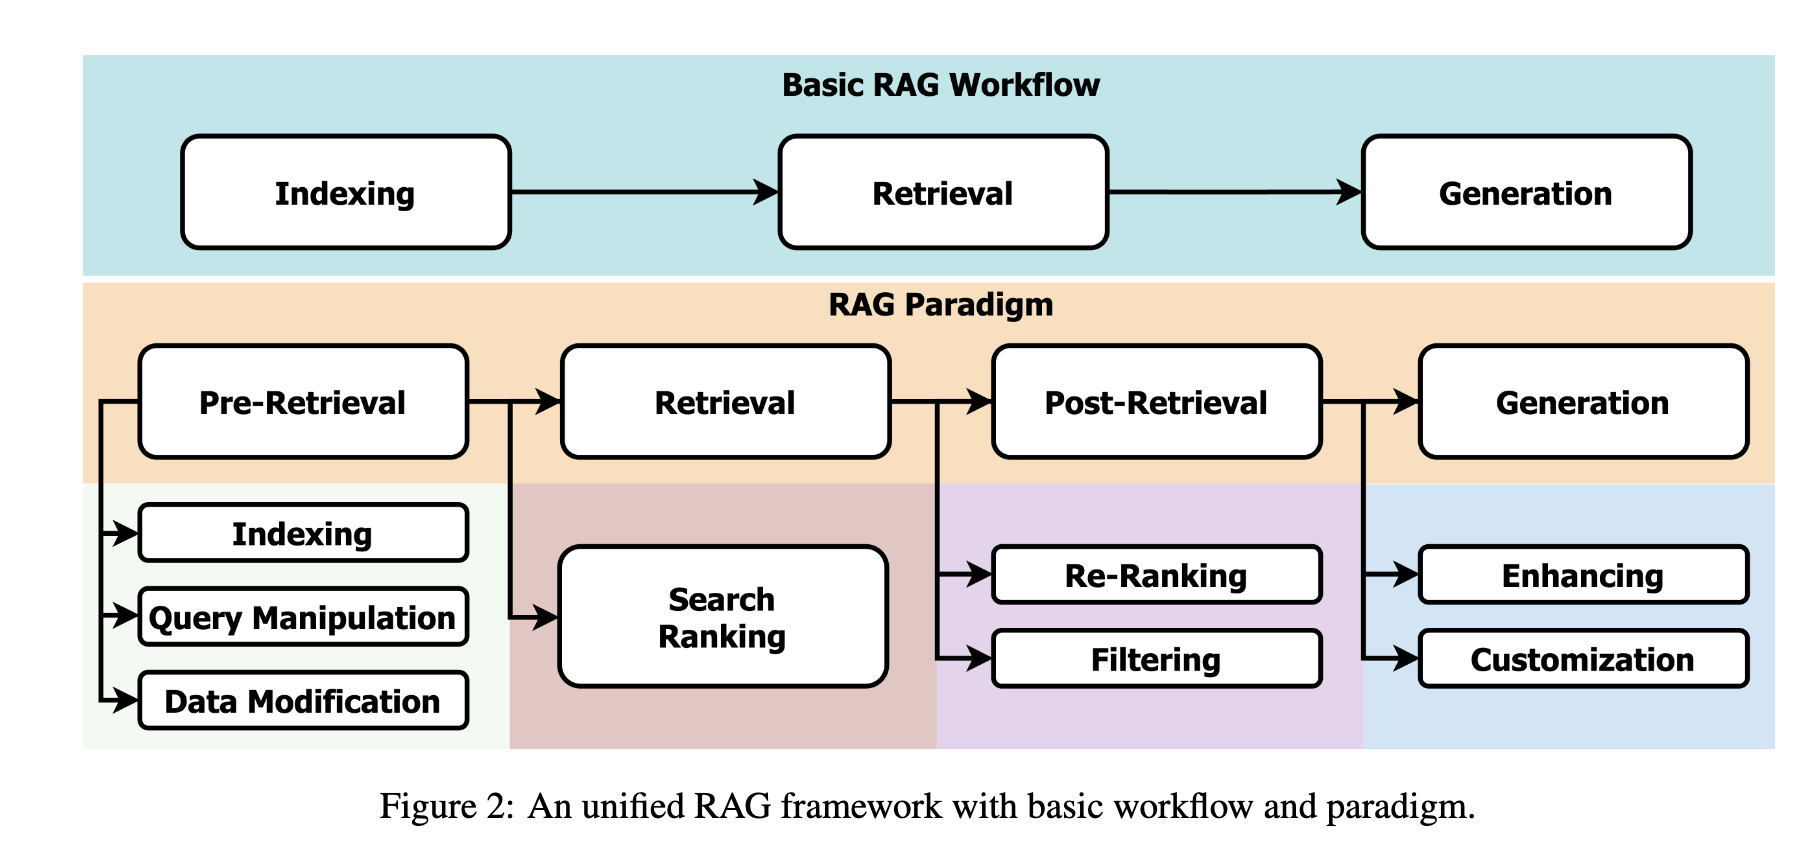

https://arxiv.org/pdf/2404.10981

## 3.1 Indexing

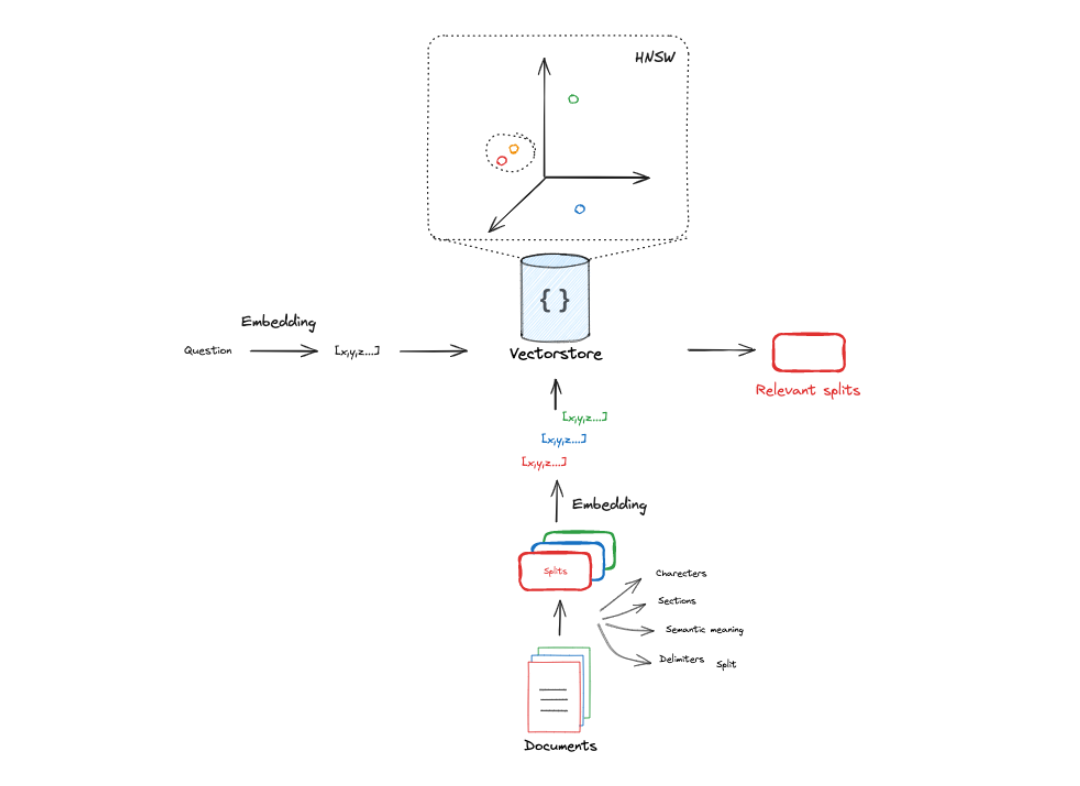
Source: [RAG from Scratch](https://github.com/langchain-ai/rag-from-scratch/blob/main/rag_from_scratch_1_to_4.ipynb)

Indexing is like creating a detailed catalog for a library. It organizes text data into smaller pieces and assigns codes to them. This lets you quickly find similar pieces of information later, just like finding a book by searching the library catalog.

### 3.1.1 Importing the Data

In [ ]:
pdf_file = "LLMAutonomousAgents.pdf"

In [ ]:
!wget https://arxiv.org/pdf/2308.11432v5 -O {pdf_file}

--2024-04-28 00:59:10--  https://arxiv.org/pdf/2308.11432v5
Resolving arxiv.org (arxiv.org)... 151.101.67.42, 151.101.195.42, 151.101.3.42, ...
Connecting to arxiv.org (arxiv.org)|151.101.67.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5605331 (5.3M) [application/pdf]
Saving to: ‘LLMAutonomousAgents.pdf’

LLMAutonomousAgents 100%[===================>]   5.34M  --.-KB/s    in 0.06s   

2024-04-28 00:59:10 (94.7 MB/s) - ‘LLMAutonomousAgents.pdf’ saved [5605331/5605331]



In [ ]:
loader = PyPDFLoader(pdf_file)

In [ ]:
data = loader.load()

In [ ]:
type(data)

list

In [ ]:
len(data) #indicates the number of pages in the PDF

42

In [ ]:
data[1]

Document(page_content='2 Front. Comput. Sci., 2024, 0(0): 1–42\n2021-12022-12023-22023-42023-62023-8Time（Year-Month）NumberofPapers（cumulated）\nWebGPT2021-12Generative Agent2023-4\nVoyager 2023-5\nToolBench 2023-7\nAgentSims 2023-8\nTool AgentSimulation AgentGeneral AgentEmbodied Agent\nTALM2022-5HuggingGPT2023-3Game Agent\nCoT 2022-1Web Agent\nWebShop2022-7InnerMonologue2022-7\nDEPS2023-2Toolformer2023-2\nAutoGPT2023-3\nAssistant Agent\nAgentGPT2023-4\nRecAgent 2023-6\nGITM2023-5\nToT2023-5\nMIND2WEB2023-6\nCO-LLM 2023-7\nChatDev 2023-7\nFig. 1 Illustration of the growth trend in the field of LLM-based autonomous agents. We present the cumulative number of\npapers published from January 2021 to August 2023. We assign di fferent colors to represent various agent categories. For\nexample, a game agent aims to simulate a game-player, while a tool agent mainly focuses on tool using. For each time period,\nwe provide a curated list of studies with diverse agent categories.\ncomplish tasks t

### 3.1.2 Splitting the Data into Chunks

In [ ]:
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=300,
    chunk_overlap=50)

splits = text_splitter.split_documents(data)

### 3.1.3 Embeddings

In [ ]:
vectorstore = Chroma.from_documents(documents=splits,
                                    embedding=OpenAIEmbeddings())

## 3.2 Retrieval

In [ ]:
retriever = vectorstore.as_retriever(search_kwargs={"k": 2})

In [ ]:
def get_query_response(question):
    docs = retriever.invoke(question)
    for i in range(len(docs)):
        print(f'Relevant Chunk Number- {i}')
        page_content = docs[i].page_content
        print("Page Content:")
        md(page_content)
        page_number = docs[i].metadata['page']
        source = docs[i].metadata['source']
        print('-------------')
        print("Page Number: ",page_number)
        print('-------------')
        print("Source: ",source)
        print('-----------------')

In [ ]:
query_1 = "Define autonomous agents."
get_query_response(query_1)

Relevant Chunk Number- 0
Page Content:


Franklin and Graesser (1997)
Autonomous agents have long been recognized
as a promising approach to achieving artificial gen-
eral intelligence (AGI), which is expected to ac-
Received month dd, yyyy; accepted month dd, yyyy
E-mail: xu.chen@ruc.edu.cn;yankailin@ruc.edu.cn
*Both authors contribute equally to this paper.arXiv:2308.11432v5  [cs.AI]  4 Apr 2024

-------------
Page Number:  0
-------------
Source:  LLMAutonomousAgents.pdf
-----------------
Relevant Chunk Number- 1
Page Content:


Franklin and Graesser (1997)
Autonomous agents have long been recognized
as a promising approach to achieving artificial gen-
eral intelligence (AGI), which is expected to ac-
Received month dd, yyyy; accepted month dd, yyyy
E-mail: xu.chen@ruc.edu.cn;yankailin@ruc.edu.cn
*Both authors contribute equally to this paper.arXiv:2308.11432v5  [cs.AI]  4 Apr 2024

-------------
Page Number:  0
-------------
Source:  LLMAutonomousAgents.pdf
-----------------


In [ ]:
query_2 = "What is handcrafting method?"
get_query_response(query_2)

Relevant Chunk Number- 0
Page Content:


are usually written into the prompt to influence the
LLM behaviors. Agent profiles typically encom-
pass basic information such as age, gender, and
career [20], as well as psychology information, re-
flecting the personalities of the agent, and social
information, detailing the relationships between
agents [21]. The choice of information to profile the
agent is largely determined by the specific applica-
tion scenarios. For instance, if the application aims
to study human cognitive process, then the psychol-
ogy information becomes pivotal. After identifying
the types of profile information, the next important
problem is to create specific profiles for the agents.
Existing literature commonly employs the following
three strategies.
Handcrafting Method : in this method, agentprofiles are manually specified. For instance, if one
would like to design agents with di fferent person-
alities, he can use "you are an outgoing person"
or "you are an introverted person" to profile the
agent. The handcrafting method has been leveraged
in a lot of previous work to indicate the agent pro-
files. For example, Generative Agent [22] describes
the agent by the information like name, objectives,
and relationships with other agents. MetaGPT [23],
ChatDev [18], and Self-collaboration [24] predefine

-------------
Page Number:  3
-------------
Source:  LLMAutonomousAgents.pdf
-----------------
Relevant Chunk Number- 1
Page Content:


are usually written into the prompt to influence the
LLM behaviors. Agent profiles typically encom-
pass basic information such as age, gender, and
career [20], as well as psychology information, re-
flecting the personalities of the agent, and social
information, detailing the relationships between
agents [21]. The choice of information to profile the
agent is largely determined by the specific applica-
tion scenarios. For instance, if the application aims
to study human cognitive process, then the psychol-
ogy information becomes pivotal. After identifying
the types of profile information, the next important
problem is to create specific profiles for the agents.
Existing literature commonly employs the following
three strategies.
Handcrafting Method : in this method, agentprofiles are manually specified. For instance, if one
would like to design agents with di fferent person-
alities, he can use "you are an outgoing person"
or "you are an introverted person" to profile the
agent. The handcrafting method has been leveraged
in a lot of previous work to indicate the agent pro-
files. For example, Generative Agent [22] describes
the agent by the information like name, objectives,
and relationships with other agents. MetaGPT [23],
ChatDev [18], and Self-collaboration [24] predefine

-------------
Page Number:  3
-------------
Source:  LLMAutonomousAgents.pdf
-----------------


## 3.3 Generate

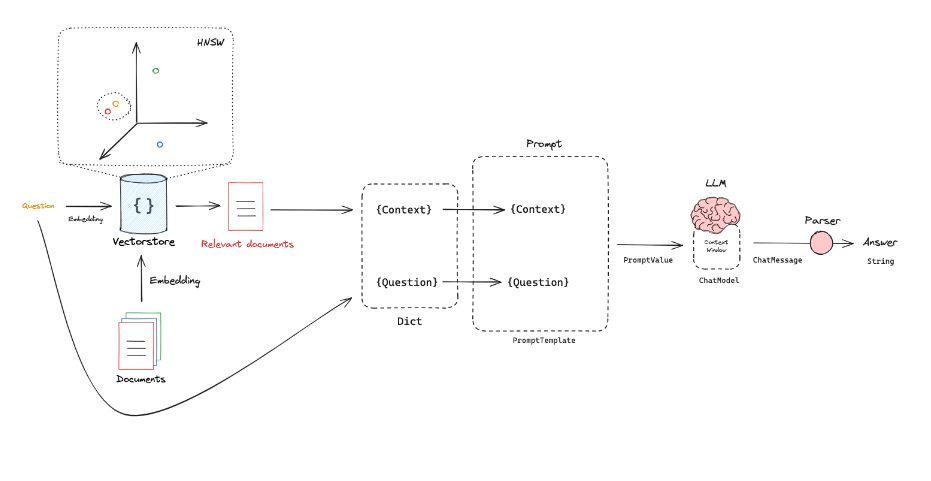
Source:[RAG from Scratch](https://github.com/langchain-ai/rag-from-scratch/blob/main/rag_from_scratch_1_to_4.ipynb)

# 4 Getting Response from RAG Chain

## 4.1 Prompt Template

In [ ]:
template = """Answer the question based only on the following context:
{context}.
Also provide the source of the answer with page number from the document.
Question: {question}
"""

prompt = ChatPromptTemplate.from_template(template)
prompt

ChatPromptTemplate(input_variables=['context', 'question'], messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], template='Answer the question based only on the following context:\n{context}.\nAlso provide the source of the answer with page number from the document.\nQuestion: {question}\n'))])

## 4.2 LLM

In [ ]:
llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0)

## 4.3 RAG Chain

In [ ]:
rag_chain = (
    {"context": retriever, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

In [ ]:
question = "Define autonomous agents."

## 4.4 Response

In [ ]:
response = rag_chain.invoke(question)
md(response)

Autonomous agents are recognized as a promising approach to achieving artificial general intelligence (AGI). They are expected to be autonomous and capable of making decisions and taking actions without human intervention. (Source: LLMAutonomousAgents.pdf, page 0)

# 5 References

* https://github.com/langchain-ai/
* https://api.python.langchain.com/en/stable/langchain_api_reference.html
* https://arxiv.org/pdf/2404.10981